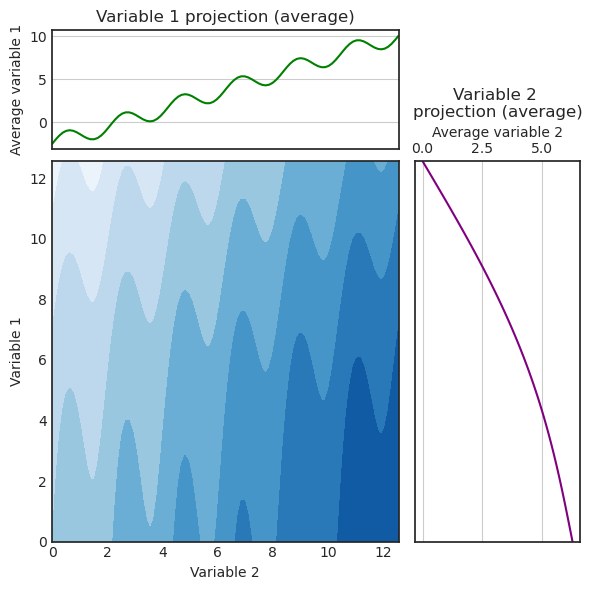

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import transforms


if __name__ == "__main__":

    #A nice style baseline
    plt.style.use("seaborn-v0_8-white")

    #Need to generate some data for plotting.
    #2 variable data for the contour plot.
    x = np.linspace(0,4*np.pi,100)
    y = x
    xx,yy = np.meshgrid(x,y)
    z = np.sin(3*xx) + np.sin(0.25*yy) + xx - 0.5*yy
    
    #Find the average across each of the variables (project the values
    # onto the axis)
    average_x = np.mean(z,axis=0)
    average_y = np.mean(z,axis=1)

    #Setup the figure - mess with these and see how they impact the plot.
    height = 6
    ratio = 2
    space = 0.1

    #Initialize the figure and gridspec.
    f = plt.figure(figsize=(height, height))
    gs = plt.GridSpec(ratio + 2, ratio + 1)
    ax_joint = f.add_subplot(gs[1:, :-1])
    ax_marg_x = f.add_subplot(gs[0, :-1], sharex=ax_joint)
    ax_marg_y = f.add_subplot(gs[1:, -1], sharey=ax_joint)

    #Here, we are turning on and off axis ticks and labels where
    # appropriate. These can be modified as needed.
    plt.setp(ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(ax_marg_x.get_xticklabels(minor=True), visible=False)
    plt.setp(ax_marg_x.yaxis.get_majorticklines(), visible=True)
    plt.setp(ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_x.get_yticklabels(), visible=True)
    plt.setp(ax_marg_x.get_yticklabels(minor=True), visible=False)
    ax_marg_x.tick_params(top=False, right=False, bottom=False)
    ax_marg_x.yaxis.grid(True)

    plt.setp(ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(ax_marg_y.get_yticklabels(minor=True), visible=False)
    plt.setp(ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(), visible=False)
    plt.setp(ax_marg_y.get_xticklabels(minor=True), visible=False)

    ax_marg_y.xaxis.grid(True)
    ax_marg_y.tick_params(top=True, left=False, right=False, bottom=False)
    ax_marg_y.xaxis.set_label_position('top')
    ax_marg_y.xaxis.tick_top()

    #The y-projection need to be rotated.
    base = ax_marg_y.transData
    rot = transforms.Affine2D().rotate_deg(270)

    #Finally, we plot the things!
    ct = ax_joint.contourf(xx,yy,z, cmap="Blues")
    ax_marg_x.plot(y,average_x, c='green')
    ax_marg_y.plot(-x,average_y, transform=rot+base, c='purple')
    #The (-x) flips the plot appropriately.

    #Axis lables and titles - never forget! 
    ax_joint.set_ylabel("Variable 1")
    ax_joint.set_xlabel("Variable 2")

    ax_marg_x.set_title('Variable 1 projection (average)')
    ax_marg_y.set_title('Variable 2 \nprojection (average)')

    ax_marg_x.set_ylabel("Average variable 1")
    ax_marg_y.set_xlabel("Average variable 2")

    #Adjust the subplot spacings to look nice.
    plt.tight_layout()
    f.subplots_adjust(hspace=space, wspace=space)

    #Save it
    f.savefig("contour_plot_with_projection.pdf")

    #Show it
    plt.show()